In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sn

In [10]:
hdf=pd.read_csv('hour.csv')
hdf.head(2)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [11]:
hdf.rename(columns={'instant':'rec_id',
...: 'dteday':'datetime',
...: 'holiday':'is_holiday',
...: 'workingday':'is_workingday',
...: 'weathersit':'weather_condition',
...: 'hum':'humidity',
...: 'mnth':'month',
...: 'cnt':'total_count',
...: 'hr':'hour',
...: 'yr':'year'},inplace=True)

In [12]:
hdf.head(2)


,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [13]:
hdf.loc[hdf['season'] == 1, 'season'] = 'Winter'
hdf.loc[hdf['season'] == 2, 'season'] = 'Spring'
hdf.loc[hdf['season'] == 3, 'season'] = 'Summer'
hdf.loc[hdf['season'] == 4, 'season'] = 'Fall'

In [14]:
hdf.loc[hdf['weekday'] < 5, 'is_weekend'] = 'False'
hdf.loc[hdf['weekday'] >= 5, 'is_weekend'] = 'True'

hdf.loc[hdf['is_holiday'] == 0, 'is_holiday'] = 'No'

hdf.loc[hdf['is_holiday'] == 1, 'is_holiday'] = 'Yes'

In [15]:
hdf['datetime'] = pd.to_datetime(hdf.datetime)

# categorical variables
hdf['season'] = hdf.season.astype('category')
hdf['is_holiday'] = hdf.is_holiday.astype('category')
hdf['weekday'] = hdf.weekday.astype('category')
hdf['weather_condition'] = hdf.weather_condition.astype('category')
hdf['is_workingday'] = hdf.is_workingday.astype('category')
hdf['month'] = hdf.month.astype('category')
hdf['year'] = hdf.year.astype('category')
hdf['hour'] = hdf.hour.astype('category')
hdf['is_weekend'] = hdf.is_weekend.astype('category')

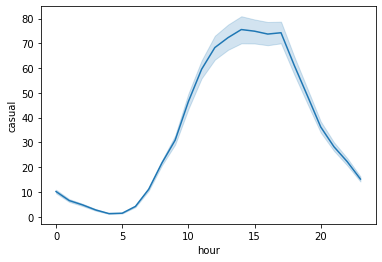

In [18]:
sn.lineplot(x="hour", y="casual", data=hdf);

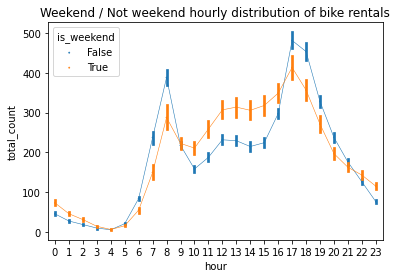

In [20]:
fig, ax = plt.subplots()
sn.pointplot(data = hdf[['hour','total_count','is_weekend']], x = 'hour', y = 'total_count',
              scale = 0.2, hue = 'is_weekend');


ax.set(title = 'Weekend / Not weekend hourly distribution of bike rentals');